In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt

from nalger_helper_functions import NeumannPoissonSolver

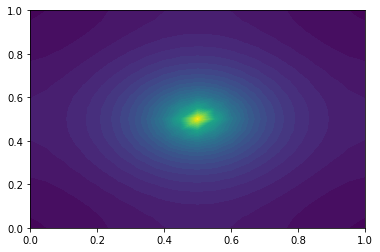

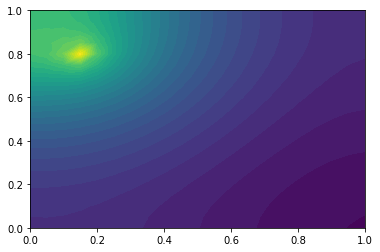

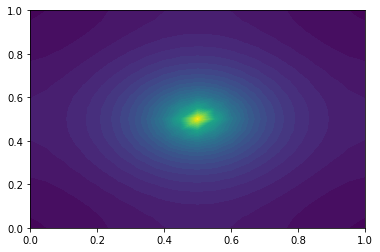

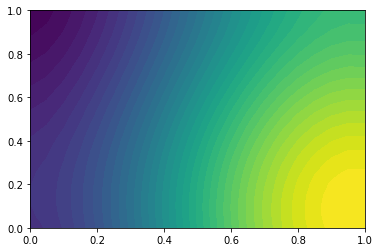

In [2]:
mesh = dl.UnitSquareMesh(20, 20)
V = dl.FunctionSpace(mesh, 'CG', 1)

NPPSS = NeumannPoissonSolver(V)

u = NPPSS.solve_point_source(np.array([0.5,0.5]), point_type='coords')
plt.figure()
dl.plot(u)

u = NPPSS.solve_point_source(31, point_type='ind')
plt.figure()
dl.plot(u)

u = NPPSS.solve_point_source(dl.Point(np.array([0.5,0.5])), point_type='fenics')
plt.figure()
dl.plot(u)

b = dl.assemble(dl.Expression('sin(x[0])*cos(x[1])', degree=2)*dl.TestFunction(V)*dl.dx)
u = NPPSS.solve(b)
plt.figure()
dl.plot(u)